# Prediction using Unsupervised ML
## Task 2 (Level - Beginner)

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

 _- Maahey Noor Sayani_

### _Importing Required Libraries_

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sb
import numpy as np
%matplotlib inline

### _Load dataset_

In [2]:
df=pd.read_csv('Iris.csv') #read dataset
df.head() #print first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.drop(['Id'],axis=1,inplace=True) #Drop the id column as it is not required
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape # Rows and Columns in dataset

(150, 5)

Information of dataset displays for each column - number of non null values and their datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Description of dataset includes mean, standard deviation, 1st 2nd and 3rd Quartiles, minimum and maximum and count of each numerical column

In [6]:
df.describe() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum() # Number of null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### _Visualizing Dataset_

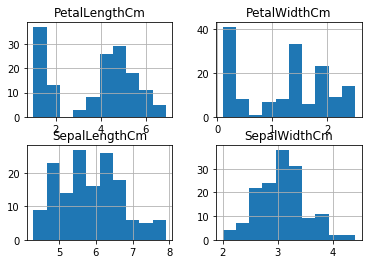

In [8]:
df.hist() #Histogram for each numerical attribute
plt.show()

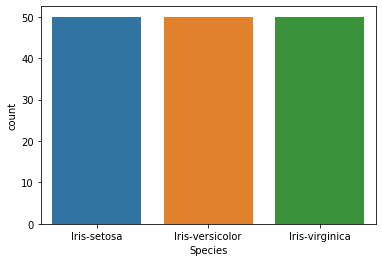

In [9]:
sb.countplot(x="Species",data=df) # Bar graph

Each category has equal number of entries (50)

### _Pair Plot_

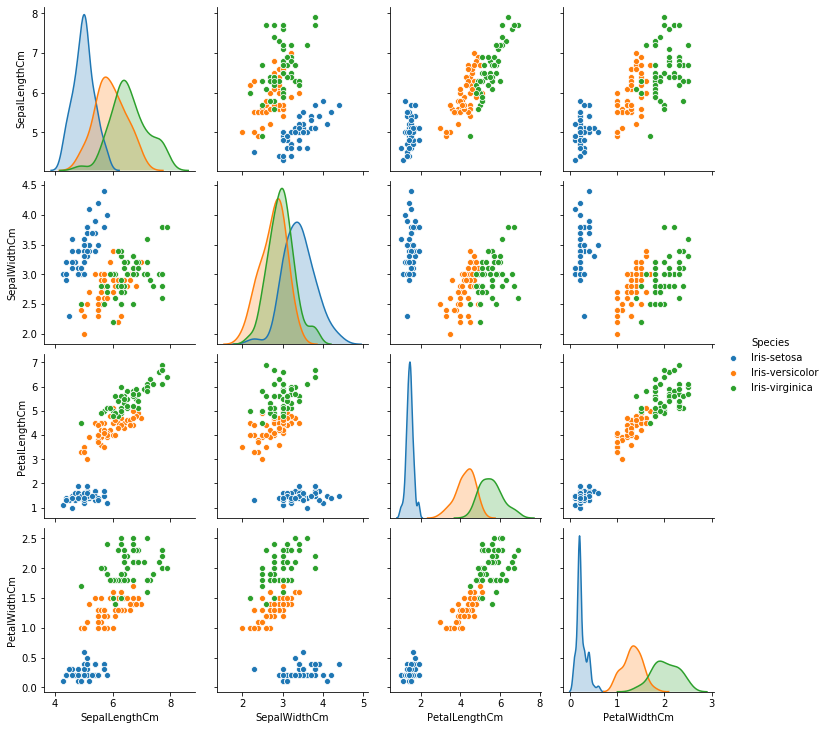

In [10]:
sb.pairplot(df,kind="scatter",hue="Species")
plt.show()

### _Heat Map to visualize correlation_

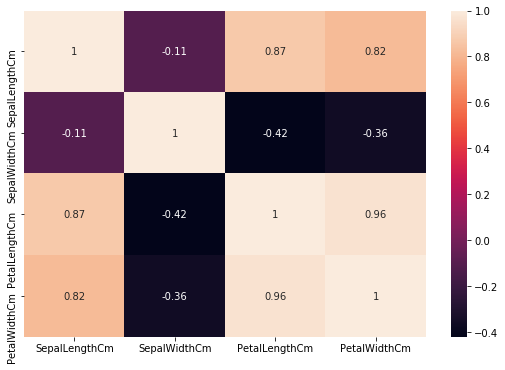

In [11]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sb.heatmap(df.corr(), annot= True)
plt.show()

PetalWidth and PetalLength show maximum correlation of 0.96

### _Predict the optimum number of clusters_

#### _Elbow Method_

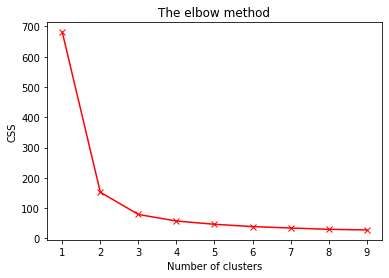

In [12]:
x=df.iloc[:,0:4].values

css=[]

for i in range(1,10):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 200, n_init = 10, random_state = 0).fit(x)
    css.append(kmeans.inertia_)
    
plt.plot(range(1, 10), css, 'bx-', color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS') # Within cluster sum of squares
plt.show()

Using the elbow method, the optimum clusters is where the elbow occurs.

Thus for the given data, we see that the optimum number of clusters can be 2 or 3

#### _Silhoutte Method_

For n_clusters = 2, silhouette score is 0.6808136202936816)
For n_clusters = 3, silhouette score is 0.5525919445499757)
For n_clusters = 4, silhouette score is 0.4972279726640147)
For n_clusters = 5, silhouette score is 0.4885175508886279)


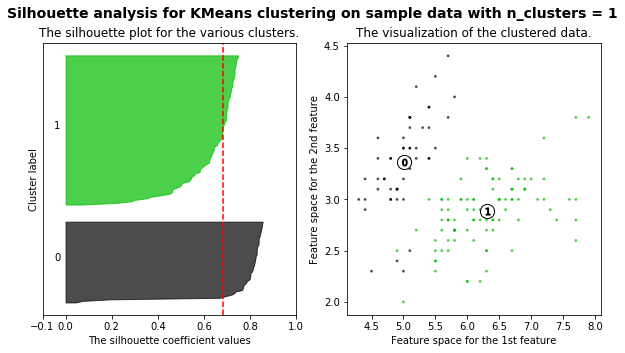

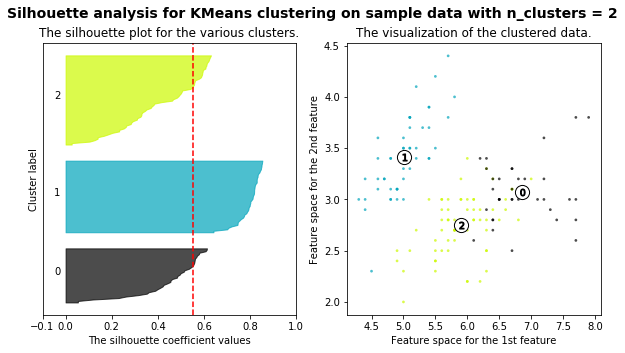

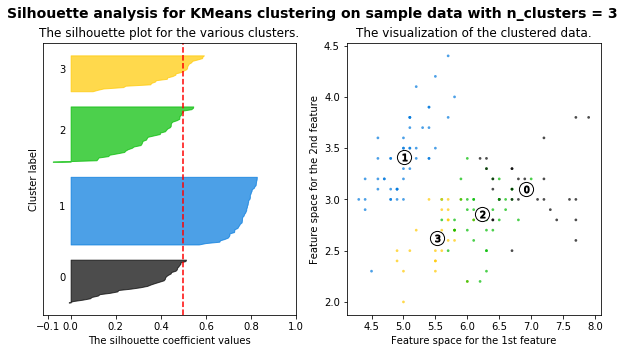

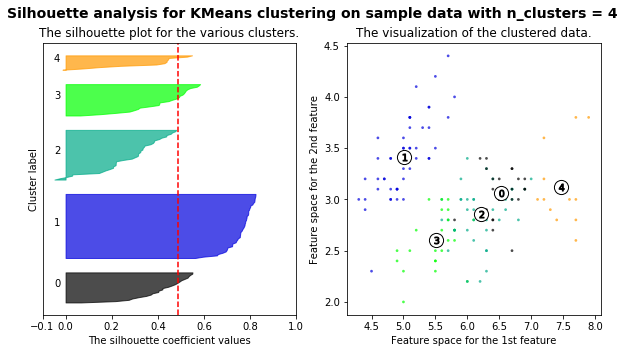

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Checking for Number of clusters between 2 and 6
for i in range(2,6): 
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10,5)
    
    #Calculate silhoutte score for each number of clusters (i)
    clusterer = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=200, random_state=0)
    preds = clusterer.fit_predict(x)
    centers = clusterer.cluster_centers_
    score = silhouette_score(x, preds)
    print("For n_clusters = {}, silhouette score is {})".format(i, score))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, preds)
    
    # for displaying the plot
    # The 1st subplot is the silhouette plot
    y_lower = 10
    for j in range(i):
        # Aggregate the silhouette scores for samples belonging to cluster j, and sort them
        cluster_silhouette_values_j = sample_silhouette_values[preds == j]
        cluster_silhouette_values_j.sort()

        size_cluster_j = cluster_silhouette_values_j.shape[0]
        y_upper = y_lower + size_cluster_j

        color = cm.nipy_spectral(float(j) / i)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values_j,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.") 
    ax1.set_xlabel("The silhouette coefficient values") 
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=score, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_yticks([]) 
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(preds.astype(float) / i)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % i),
                 fontsize=14, fontweight='bold')

plt.show()


_**Silhouette analysis**_ done on the above plots to select an optimal value for number of clusters (i)
* The value of i as 4 and 5 looks to be suboptimal for the given data due to the following reasons:
    1. Presence of clusters with below-average silhouette scores 
    2. Wide fluctuations in the size of the silhouette plots.
* The value of 2 and 3 for i looks to be the optimal one. 
    1. The silhouette score for each cluster is above average silhouette scores. 
    2. Also, the fluctuation in size is similar. 
    3. The thickness of the silhouette plot representing each cluster also is a deciding point. 
* For the plot with i = 3 , the thickness is more uniform than the plot with i as 2  with one cluster thickness much more than the other.
#### Thus, one can select the optimal number of clusters as 3.

### _Visualizing the clusters_

In [14]:
# Applying kmeans to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 200, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

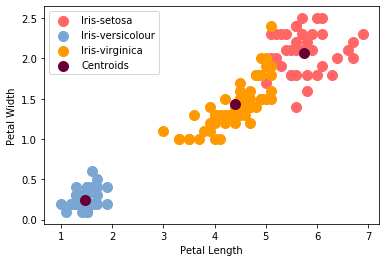

In [15]:
# Visualising the clusters on PetalLengthCm,PetalWidthCm columns
# SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = '#ff6666', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = '#79a6d2', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = '#ff9900', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = '#660033', label = 'Centroids')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()